# An open RNA-Seq data analysis pipeline tutorial with an example of reprocessing data from a recent Zika virus study

_Zichen Wang_<sup>1</sup> and _Avi Ma'ayan_<sup>1*</sup>

<sup>1</sup>Department of Pharmacology and Systems Therapeutics;  
BD2K-LINCS Data Coordination and Integration Center;  
Mount Sinai Knowledge Management Center for Illuminating the Druggable Genome;  
Icahn School of Medicine at Mount Sinai, One Gustave L. Levy Place, Box 1603, New York, NY 10029 USA  

*Correspondence: [avi.maayan@mssm.edu](mailto:avi.maayan@mssm.edu)

---
## Abstract

RNA-seq analysis is becoming a standard method for global gene expression profiling. However, open and standard pipelines to perform RNA-seq analysis by non-experts remain challenging due to the large size of the raw data files and the hardware requirements for running the alignment step. Here we introduce a reproducible open source RNA-seq pipeline delivered as an IPython notebook and a Docker image. The pipeline uses state-of-the-art tools and can run on various platforms with minimal configuration overhead. The pipeline enables the extraction of knowledge from typical RNA-seq studies by generating interactive principal component analysis (PCA) and hierarchical clustering (HC) plots, performing enrichment analyses against over 90 gene set libraries, and obtaining lists of small molecules that are predicted to either mimic or reverse the observed changes in mRNA expression. We apply the pipeline to a recently published RNA-seq dataset collected from human neuronal progenitors infected with the Zika virus (ZIKV). In addition to confirming the presence of cell cycle genes among the genes that are downregulated by ZIKV, our analysis uncovers significant overlap with upregulated genes that when knocked out in mice induce defects in brain morphology. This result potentially points to the molecular processes associated with the microcephaly phenotype observed in newborns from pregnant mothers infected with the virus. In addition, our analysis predicts small molecules that can either mimic or reverse the expression changes induced by ZIKV. The IPython notebook and Docker image are freely available at: http://nbviewer.jupyter.org/github/maayanlab/Zika-RNAseq-Pipeline/blob/master/Zika.ipynb and https://hub.docker.com/r/maayanlab/zika/ 
### Keywords

Systems biology, bioinformatics pipeline, gene expression analysis, RNA-seq

---

### Introduction

The increase in awareness about the irreproducibility of scientific research requires the development of methods that make experimental and computational protocols easily repeatable and transparent [[1]](#ref1). The advent of interactive notebooks for data analysis pipelines significantly enhances the recording and sharing of data, source code, and figures [[2]](#ref2). In a subset of recent publications, an interactive notebook was published alongside customary manuscripts [[3]](#ref3). Similarly, here we present an interactive IPython notebook (http://nbviewer.jupyter.org/github/maayanlab/Zika-RNAseq-Pipeline/blob/master/Zika.ipynb) that serves as a tutorial for performing a standard RNA-seq pipeline. The IPython notebook pipeline provides scripts (http://dx.doi.org/10.5281/zenodo.56311) that process the raw data into interactive figures and permits other downstream analyses that can enable others to quickly and properly repeat our analysis as well as extract knowledge from their own data. As an example, we applied the pipeline to RNA-seq data from a recent publication where human induced pluripotent stem cells were differentiated to neuronal progenitors and then infected with Zika virus (ZIKV) [[4]](#ref4). The aim of the study was to begin to understand the molecular mechanisms that induce the observed devastating phenotype of newborn-microcephaly from pregnant mothers infected with the virus.

### Methods and results

The first publicly available study profiling gene expression changes after ZIKV infection of human cells was deposited into NCBI's Gene Expression Omnibus (GEO) in March 2016. The raw data is available (ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895/) from the Sequence Read Archive (SRA) with accession number GSE78711. In this study, gene expression was measured by RNA-seq using two platforms: MiSeq and NextSeq [[4]](#ref4) in duplicates. The total number of samples is eight, with four untreated samples and four infected samples. We first downloaded the raw sequencing files from SRA and then converted to FASTQ files. Quality Control (QC) for the RNA-Seq reads was assessed using FastQC [[5]](#ref5). The reports generated by FastQC were in HTML format and can be accessed through hyperlinks from the IPython notebook. The reads in the FASTQ files were aligned to the human genome with Spliced Transcripts Alignment to a Reference (STAR) [[6]](#ref6). STAR is a leading aligner that accomplishes the alignment step faster and more accurately than other current alternatives [[6]](#ref6). We next applied featureCounts [[7]](#ref7) to assign reads to genes, and then applied the edgeR Bioconductor package [[8]](#ref8) to compute counts per million (CPM) and reads per kilobase million (RPKM). The next steps are performed in Python within the IPython notebook. We first filtered out genes that are not expressed or lowly expressed. Subsequently, we performed principal component analysis (PCA) (Fig. 1). The PCA plots show that the samples cluster by infected vs. control cells, but also by platform. Next, we visualized the 800 genes with the largest variance using an interactive hierarchical clustering (HC) plot (Fig. 2). This analysis separates the groups of genes that are differentially expressed by infected vs. control from those that are differential by platform. The visualization of the clusters is implemented with an interactive external web-based data visualization tool called clustergrammer (http://amp.pharm.mssm.edu/clustergrammer/). Clustergrammer provides interactive searching, sorting and zoom capabilities.

The following step is to identify the differentially expressed genes (DEG) between the two conditions. This is achieved with a unique method we developed called the Characteristic Direction (CD) [[9]](#ref9). The CD method is a multivariate method that we have previously demonstrated to outperform other leading methods that compute differential expression between two conditions [[9]](#ref9). Once we have ranked the lists of DEG, we submit these for signature analysis using two tools: Enrichr [[10]](#ref10) and L1000CDS2 [[11]](#ref11). Enrichr queries the up and down gene sets against over 180,000 annotated gene sets belonging to 90 gene set libraries covering pathway databases, ontologies, disease databases, and more [[10]](#ref10). The results from this enrichment analysis confirm that the downregulated genes after ZIKV infection are enriched for genes involved in cell cycle-related processes (Fig. 3a). These genes are enriched for targets of the transcription factors E2F4 and FOXM1 (Fig. 3b). Both transcription factors are known to regulate cell proliferation and play central role in many cancers. The downregulation of cell cycle genes was already reported in the original publication; nevertheless, we obtained more interesting results for the enriched terms that appeared most significant for the upregulated genes. Particularly, the top two terms from the mouse genome informatics (MGI) Mammalian Phenotype Level 4 library are abnormal nervous system (MP0003861) and abnormal brain morphology (MP0002152) (Table S1). This library associates gene knockouts in mice with mammalian phenotypes. These enriched terms enlist a short set of genes that potentially link ZIKV infection with the concerning observed microcephaly phenotype. Finally, to identify small molecules that can potentially either reverse or mimic ZIKV-induced gene expression changes, we query the ZIKV-induced signatures against the LINCS L1000 data. For this, we utilize L1000CDS2 [[11]](#ref11), a search engine that prioritize small molecules given a gene expression signature as input. L1000CDS2 contains 30,000 significant signatures that were processed from the LINCS L1000 data with the CD method. The results suggest small molecules that could be tested in follow-up studies in human cells for potential efficacy against ZIKV (Table S2).

To ensure the reproducibility of the computational environment used for the whole RNA-Seq pipeline, we packaged all the software components used in this tutorial, including the command line tools, R packages, and Python packages into a Docker image. This Docker image is made publically available at https://hub.docker.com/r/maayanlab/zika/. The Docker image was created based on the specifications outlined on the official IPython’s Scipy Stack image (https://hub.docker.com/r/IPython/scipystack/). The additional command line tools, R scripts, and Python packages together with their dependencies were compiled and installed into the Docker image. The RNA-Seq pipeline Docker image was deployed onto our Mesos cluster, which allows users to run the IPython notebook interactively. The Docker image can also be downloaded and executed on local computers and servers, or deployed in the cloud if users have access to cloud provider services with a Docker Toolbox installed (https://www.docker.com/products/docker-toolbox). We also provide detailed instructions on how to download and execute the Docker image (https://hub.docker.com/r/maayanlab/zika/). 

The ‘Dockerization’ of the RNA-Seq pipeline facilitates reproducibility of the pipeline at the software level because the Docker image ensures that all versions of the software components are consistent and static. Dockerization also helps users to handle the complex installation of many dependencies required for the computational pipeline. Moreover, the Docker image can be executed on a single computer, clusters/servers and on the cloud. The only limitation of having a Docker image is that it prevents users from adding or altering the various steps which require additional software components and packages. However, advanced users can build their own Docker images based on our initial image to customize it for their needs.

In [1]:
import os
import numpy as np
import pandas as pd

Below we assign some global variables that will be used across the rest of the notebook.    
**Please change these variables accordingly if you intend to use this for other studies. **

In [2]:
# The URL for the SRA study (project), usually in a SRPxxxxx folder including several SRRxxxxx folders (samples)
os.environ['FTP_URL'] = 'ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895/'
# The working directory to store all the sequencing data, will be created if not exists
os.environ['WORKDIR'] = 'data/Zika/'
# The directory for the reference genome
os.environ['GENOMEDIR'] = 'genomes/Homo_sapiens/UCSC/hg19'

In [3]:
# Download the SRA files
# This bash script is commented out because we don't want to download the files every time.
!mkdir -p $WORKDIR
!wget -r $FTP_URL \
    --no-parent -nH --cut-dirs=8 \
    -P $WORKDIR

--2016-06-23 11:53:28--  ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895/
           => 'data/Zika/.listing'
Resolving ftp-trace.ncbi.nlm.nih.gov... 130.14.250.13, 2607:f220:41e:250::7
Connecting to ftp-trace.ncbi.nlm.nih.gov|130.14.250.13|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895 ... done.
==> PASV ... done.    ==> LIST ... done.

.listing                [ <=>                ]     600  --.-KB/s    in 0.003s  

2016-06-23 11:53:28 (209 KB/s) - 'data/Zika/.listing' saved [600]

Removed 'data/Zika/.listing'.
--2016-06-23 11:53:28--  ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895/SRR3191542/
           => 'data/Zika/SRR3191542/.listing'
==> CWD (1) /sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895/SRR3191542 ... done.
==> PASV ... done.    ==> LIST ... done.

S

In [4]:
## Examine the downloaded SRA files downloaded
!ls -lh $WORKDIR/SRR*/*.sra

-rw-r--r--  1 zichen  staff   464M Feb 26 21:21 data/Zika//SRR3191542/SRR3191542.sra
-rw-r--r--  1 zichen  staff   444M Feb 26 21:22 data/Zika//SRR3191543/SRR3191543.sra
-rw-r--r--  1 zichen  staff   430M Feb 26 21:21 data/Zika//SRR3191544/SRR3191544.sra
-rw-r--r--  1 zichen  staff   446M Feb 26 21:21 data/Zika//SRR3191545/SRR3191545.sra
-rw-r--r--  1 zichen  staff   2.3G Feb 29 17:19 data/Zika//SRR3194428/SRR3194428.sra
-rw-r--r--  1 zichen  staff   3.0G Feb 29 17:20 data/Zika//SRR3194429/SRR3194429.sra
-rw-r--r--  1 zichen  staff   2.4G Feb 29 17:21 data/Zika//SRR3194430/SRR3194430.sra
-rw-r--r--  1 zichen  staff   2.1G Feb 29 17:09 data/Zika//SRR3194431/SRR3194431.sra


### The downloaded SRA files are next processed by following these steps:
1. `fastq-dump` in the SRA-toolkit to generate .fastq files
2. `FastQC`<sup>[3](#ref3)</sup> to perform Quality Controls and generate QC report for the input RNA-seq data
2. `STAR`<sup>[3](#ref3)</sup> for the read alignment
3. `featureCounts`<sup>[4](#ref4)</sup> for assigning reads to genes
4. `edgeR` Bioconductor package<sup>[5](#ref5)</sup> were used to compute CPM and RPKM
---
Steps 1-4 are processed by this bash script [`analyze_sra.sh`](https://github.com/MaayanLab/Zika-RNAseq-Pipeline/blob/master/analyze_sra.sh). This bash script can take command line arguments specifying the location of the reference genome and working directory for the SRA files.

In [5]:
!bash analyze_sra.sh -h

Usage: ./analyze_sra.sh -g <GENOME> -w <WORKDIR>


We run the bash script by specifying the working directory and the genome directory and pipe the log into a `analyze_sra.log` file

In [6]:
!bash analyze_sra.sh -w $WORKDIR -g $GENOMEDIR | tee analyze_sra.log

Dumping .sra to .fastq
SINGLE/SRR3194428/SRR3194428.sra
Read 72983243 spots for SINGLE/SRR3194428/SRR3194428.sra
Written 72983243 spots for SINGLE/SRR3194428/SRR3194428.sra
SINGLE/SRR3194429/SRR3194429.sra
Read 94729809 spots for SINGLE/SRR3194429/SRR3194429.sra
Written 94729809 spots for SINGLE/SRR3194429/SRR3194429.sra
SINGLE/SRR3194430/SRR3194430.sra
Read 76299868 spots for SINGLE/SRR3194430/SRR3194430.sra
Written 76299868 spots for SINGLE/SRR3194430/SRR3194430.sra
SINGLE/SRR3194431/SRR3194431.sra
Read 66528035 spots for SINGLE/SRR3194431/SRR3194431.sra
Written 66528035 spots for SINGLE/SRR3194431/SRR3194431.sra
PAIRED/SRR3191542/SRR3191542.sra
Read 7927777 spots for PAIRED/SRR3191542/SRR3191542.sra
Written 7927777 spots for PAIRED/SRR3191542/SRR3191542.sra
PAIRED/SRR3191543/SRR3191543.sra
Read 7391076 spots for PAIRED/SRR3191543/SRR3191543.sra
Written 7391076 spots for PAIRED/SRR3191543/SRR3191543.sra
PAIRED/SRR3191544/SRR3191544.sra
Read 7361527 spots for PAIRED/SRR3191544/SRR3191

Step 5 is done with this R script [`normalize.R`](https://github.com/MaayanLab/Zika-RNAseq-Pipeline/blob/master/normalize.R)

In [7]:
!Rscript normalize.R $WORKDIR

Setting WORKDIR to: data/Zika/ 
Loading required package: limma
Loading required package: methods
Finished reading featureCount into data.frame with shape:  25370 9
RPKM matrix written to "repRpkmMatrix_featureCounts.csv"
CPM matrix file written to "repCpmMatrix_featureCounts.csv"

In [8]:
## We can examine the QC reports from the FastQC program to evaluate the quality of the data
from IPython.display import FileLinks
FileLinks(os.path.join(os.environ['WORKDIR'], 'fastQC_output'), included_suffixes=['.html'])

data/Zika/fastQC_output/
  SRR3191542_1_fastqc.html
  SRR3191542_2_fastqc.html
  SRR3191543_1_fastqc.html
  SRR3191543_2_fastqc.html
  SRR3191544_1_fastqc.html
  SRR3191544_2_fastqc.html
  SRR3191545_1_fastqc.html
  SRR3191545_2_fastqc.html
  SRR3194428_fastqc.html
  SRR3194429_fastqc.html
  SRR3194430_fastqc.html
  SRR3194431_fastqc.html

In [9]:
## Check the alignment stats
## This will output the first 10 lines of all summary files from the featureCounts folder
!head $WORKDIR/featureCount_output/*.summary 

==> data/Zika//featureCount_output/SRR3191542.count.txt.summary <==
Status	/home/maayanlab/Zika/star_output/SRR3191542Aligned.sortedByCoord.out.bam
Assigned	10859768
Unassigned_Ambiguity	277433
Unassigned_MultiMapping	1315262
Unassigned_NoFeatures	3658745
Unassigned_Unmapped	0
Unassigned_MappingQuality	0
Unassigned_FragementLength	0
Unassigned_Chimera	0
Unassigned_Secondary	0

==> data/Zika//featureCount_output/SRR3191543.count.txt.summary <==
Status	/home/maayanlab/Zika/star_output/SRR3191543Aligned.sortedByCoord.out.bam
Assigned	10167142
Unassigned_Ambiguity	264366
Unassigned_MultiMapping	1229314
Unassigned_NoFeatures	3217017
Unassigned_Unmapped	0
Unassigned_MappingQuality	0
Unassigned_FragementLength	0
Unassigned_Chimera	0
Unassigned_Secondary	0

==> data/Zika//featureCount_output/SRR3191544.count.txt.summary <==
Status	/home/maayanlab/Zika/star_output/SRR3191544Aligned.sortedByCoord.out.bam
Assigned	10024864
Unassigned_Ambiguity	243520
Unassigned_MultiMapping	1148955
Unassigned_NoF

After you completed successfully the above steps, you can start to analyze the processed expression matrix of gene expression in Python

In [10]:
## Load the expression matrix
expr_df = pd.read_csv(os.path.join(os.environ['WORKDIR'], 'repCpmMatrix_featureCounts.csv'))
expr_df = expr_df.set_index(expr_df.columns[0])
expr_df.head()

,SRR3191542,SRR3191543,SRR3191544,SRR3191545,SRR3194428,SRR3194429,SRR3194430,SRR3194431
Unnamed: 0,,,,,,,,
DDX11L1,0.000000,0.000000,0.199504,0.00000,0.000000,0.000000,0.020095,0.000000
WASH7P,16.759106,18.097515,17.057588,23.59738,2.491865,2.907422,2.190377,2.396793
MIR6859-2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
MIR6859-1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [11]:
print expr_df.shape

(25370, 8)


In [12]:
## Filter out non-expressed genes
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print expr_df.shape

## Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print expr_df.shape

(21983, 8)
(16242, 8)


Obtain more metadata about the samples by clicking on the `RunInfo Table` button on the SRP page available in this URL [http://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP070895](http://www.ncbi.nlm.nih.gov/Traces/study/?acc=SRP070895). Clicking on this button downloads a spreadsheet with additional metadata. Next read this file and extract the relavant variables from it.

In [13]:
meta_df = pd.read_csv(os.path.join(os.environ['WORKDIR'], 'SraRunTable.txt'), sep='\t').set_index('Run_s')
print meta_df.shape
# re-order the index to make it the same with expr_df
meta_df = meta_df.ix[expr_df.columns]
meta_df

(8, 27)


,BioSample_s,Experiment_s,LibraryLayout_s,LoadDate_s,MBases_l,MBytes_l,SRA_Sample_s,Sample_Name_s,infection_status_s,Assay_Type_s,...,Library_Name_s,Organism_s,Platform_s,ReleaseDate_s,SRA_Study_s,cell_type_s,g1k_analysis_group_s,g1k_pop_code_s,source_s,source_name_s
SRR3191542,SAMN04517925,SRX1602854,PAIRED,2016-02-26,1141,464,SRS1312741,GSM2073121,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3191543,SAMN04517926,SRX1602855,PAIRED,2016-02-26,1063,443,SRS1312740,GSM2073122,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3191544,SAMN04517927,SRX1602856,PAIRED,2016-02-26,1059,429,SRS1312738,GSM2073123,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3191545,SAMN04517928,SRX1602857,PAIRED,2016-02-26,1095,445,SRS1312739,GSM2073124,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194428,SAMN04521221,SRX1605077,SINGLE,2016-02-29,5248,2383,SRS1314803,GSM2075585,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194429,SAMN04521222,SRX1605078,SINGLE,2016-02-29,6806,3092,SRS1314802,GSM2075586,mock infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194430,SAMN04521223,SRX1605079,SINGLE,2016-02-29,5481,2495,SRS1314801,GSM2075587,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells
SRR3194431,SAMN04521224,SRX1605080,SINGLE,2016-02-29,4776,2181,SRS1314800,GSM2075588,Zika infected,RNA-Seq,...,<not provided>,Homo sapiens,ILLUMINA,2016-03-04,SRP070895,Neural Progenitor cells,<not provided>,<not provided>,<not provided>,human Neural Progenitor cells


Now we have everything setup, the first thing to do is to generate PCA plots to observe whether the samples cluster
as expected: controls with controls, and treatments with treatments.

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
# ignore FutureWarning that may pop up when plotting
import warnings
warnings.filterwarnings("ignore")
import urllib3
urllib3.disable_warnings()

In [15]:
from IPython.display import HTML, display
# to display hyperlink as <a> tag in output cells
def display_link(url):
    raw_html = '<a href="%s" target="_blank">%s</a>' % (url, url)
    return display(HTML(raw_html))

You can obtain the script [`RNAseq`](https://github.com/MaayanLab/Zika-RNAseq-Pipeline/blob/master/RNAseq.py) from this repo.

In [16]:
import RNAseq

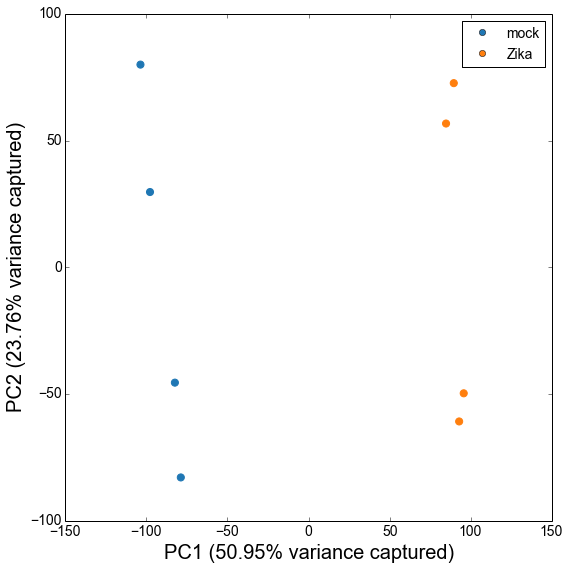

In [17]:
# plot PCA
%matplotlib inline
RNAseq.PCA_plot(expr_df.values, meta_df['infection_status_s'], 
         standardize=2, log=True, 
         show_text=False, sep=' ', legend_loc='upper right')

The PCA plot below is the same as above, except that we color the samples by platform (two Illumina sequencing machines used: [Illumina MiSeq](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL15520) for paired-end and [Illumina NextSeq 500](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL18573) for single-end). 

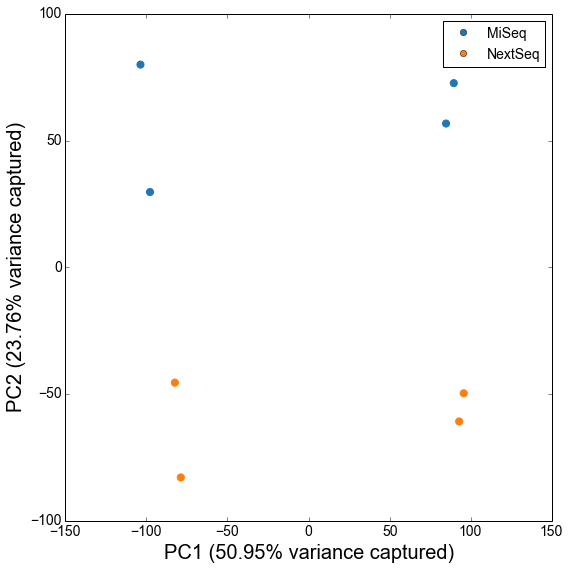

In [18]:
d_layout_platform = {'PAIRED': 'MiSeq', 'SINGLE': 'NextSeq 500'}
meta_df['platform'] = [d_layout_platform[l] for l in meta_df['LibraryLayout_s']]
RNAseq.PCA_plot(expr_df.values, meta_df['platform'], 
         standardize=2, log=True, 
         show_text=False, sep=' ', legend_loc='upper right')

We can also plot a 3D interactive PCA plot using [plotly](https://plot.ly/), which has a nice integration with Jupyter notebooks.

In [19]:
# Compute the coordinates of samples in the PCA space
variance_explained, pca_transformed = RNAseq.perform_PCA(expr_df.values, standardize=2, log=True)
# Bind x, y, z coordinates to meta_df
meta_df['x'] = pca_transformed[:,0]
meta_df['y'] = pca_transformed[:,1]
meta_df['z'] = pca_transformed[:,2]

In [20]:
import plotly
plotly.offline.init_notebook_mode() # To embed plots in the output cell of the notebook
import plotly.graph_objs as go

conditions = meta_df['infection_status_s'].unique().tolist()
platforms = meta_df['platform'].unique().tolist()
SYMBOLS = ['circle', 'square']
COLORS = RNAseq.COLORS10

data = [] # To collect all Scatter3d instances
for (condition, platform), meta_df_sub in meta_df.groupby(['infection_status_s', 'platform']):
    # Iteratate through samples grouped by condition and platform
    display_name = '%s, %s' % (condition, platform)
    # Initiate a Scatter3d instance for each group of samples specifying their coordinates
    # and displaying attributes including color, shape, size and etc.
    trace = go.Scatter3d(
        x=meta_df_sub['x'],
        y=meta_df_sub['y'],
        z=meta_df_sub['z'],
        text=meta_df_sub.index,
        mode='markers',
        marker=dict(
            size=10,
            color=COLORS[conditions.index(condition)], # Color by infection status
            symbol=SYMBOLS[platforms.index(platform)], # Shaped by sequencing platforms
            opacity=.8,
        ),
        name=display_name,
    )
    
    data.append(trace)

# Configs for layout and axes
layout=dict(height=1000, width=1000, 
            title='3D PCA plot for samples in Zika study',
            scene=dict(
                xaxis=dict(title='PC1 (%.2f%% variance)' % variance_explained[0]),
                yaxis=dict(title='PC2 (%.2f%% variance)' % variance_explained[1]),
                zaxis=dict(title='PC3 (%.2f%% variance)' % variance_explained[2])
               )
)
fig=dict(data=data, layout=layout)
plotly.offline.iplot(fig)

/Library/Python/2.7/site-packages/requests/packages/urllib3/util/ssl_.py:315: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning


Alternatively, we can visualize the gene expression matrix using [Clustergrammer](http://amp.pharm.mssm.edu/clustergrammer/). Clustergrammer is a visualization tool that we developed to enable users and web-based applications to easily generate interactive and shareable clustergram-heatmap visualizations from a matrices of data. In the following code, we display a subset the expression matrix using genes with the largest variance. We then log transform and z-score center the expression matrix so that it has an average of zero, and a standard deviation of unity for each gene on the rows. We write the subset of expression matrix into a text file, and then use a HTTP `POST` of this file to the [API of Clustergrammer](http://amp.pharm.mssm.edu/clustergrammer/help#api). The API then responds with a URL to the interactive clustergram.

In [21]:
# Subset the expression DataFrame using top 800 genes with largest variance
variances = np.var(expr_df, axis=1)
srt_idx = variances.argsort()[::-1]
expr_df_sub = expr_df.iloc[srt_idx].iloc[:800]
print expr_df_sub.shape
expr_df_sub.head()

(800, 8)


,SRR3191542,SRR3191543,SRR3191544,SRR3191545,SRR3194428,SRR3194429,SRR3194430,SRR3194431
Unnamed: 0,,,,,,,,
EEF1A1,8021.718328,7752.031003,7137.952196,6955.714584,4366.286832,4329.009117,3957.709649,3824.428216
WSB1,4070.252698,4206.295142,1150.738803,1236.831526,4592.651973,4828.943487,1296.019894,1376.058527
TUBA1A,5898.284383,6204.103375,5367.653865,5144.809094,4246.137423,4503.896870,3828.557793,3731.460320
ACTG1,6083.463293,6486.975396,4879.367940,4734.369419,6019.971299,6360.412214,4719.880434,4699.994974
MIAT,2971.610443,2985.106336,1477.426527,1454.333606,2832.087276,2879.532851,1425.091370,1370.204822


In [25]:
# Log transform and z-score standardize the data and write to a .txt file 
expr_df_sub.index.name=''
expr_df_sub = np.log1p(expr_df_sub)
expr_df_sub = expr_df_sub.apply(lambda x: (x-x.mean())/x.std(ddof=0), axis=1)
# prettify sample names
sample_names = ['-'.join([x, d_layout_platform[y], z]) for x,y,z in
                   zip(meta_df['infection_status_s'], meta_df['LibraryLayout_s'], expr_df_sub.columns)]
expr_df_sub.columns = sample_names
expr_df_sub_file = os.path.join(os.environ['WORKDIR'], 'expression_matrix_top800_genes.txt')
expr_df_sub.to_csv(expr_df_sub_file, sep='\t')

In [26]:
# POST the expression matrix to Clustergrammer and get the URL
import requests, json
clustergrammer_url = 'http://amp.pharm.mssm.edu/clustergrammer/matrix_upload/'

r = requests.post(clustergrammer_url, files={'file': open(expr_df_sub_file, 'rb')})
link = r.text
display_link(link)

We can also display the result in this notebook using `<iframe>`

In [28]:
from IPython.display import IFrame
display(IFrame(link, width="1000", height="1000"))

Now we are ready to identify the differentially expressed genes between the two sets of samples: control vs. treatment. We will achieve this using the [Characteristic Direction method](http://www.ncbi.nlm.nih.gov/pubmed/?term=24650281)<sup>[6](#ref6)</sup> that we developed and published in _BMC Bioinformatics_ in 2014.

An implementation in Python of the Characteristic Direction method can be downloaded and installed from here:
https://github.com/wangz10/geode.

In [29]:
import geode
d_platform_cd = {} # to top up/down genes
cd_results = pd.DataFrame(index=expr_df.index)

sample_classes = {}
for layout in meta_df['LibraryLayout_s'].unique():
    ## make sample_class 
    sample_class = np.zeros(expr_df.shape[1], dtype=np.int32)
    sample_class[meta_df['LibraryLayout_s'].values == layout] = 1
    sample_class[(meta_df['LibraryLayout_s'].values == layout) & 
                 (meta_df['infection_status_s'].values == 'Zika infected')] = 2
    platform = d_layout_platform[layout]
    sample_classes[platform] = sample_class

sample_classes['combined'] = sample_classes['MiSeq'] + sample_classes['NextSeq 500']
print sample_classes

for platform, sample_class in sample_classes.items():
    cd_res = geode.chdir(expr_df.values, sample_class, expr_df.index, 
                      gamma=.5, sort=False, calculate_sig=False)
    cd_coefs = np.array(map(lambda x: x[0], cd_res))
    cd_results[platform] = cd_coefs
    
    # sort CD in by absolute values in descending order
    srt_idx = np.abs(cd_coefs).argsort()[::-1]
    cd_coefs = cd_coefs[srt_idx][:600]
    sorted_DEGs = expr_df.index[srt_idx][:600]
    # split up and down
    up_genes = dict(zip(sorted_DEGs[cd_coefs > 0], cd_coefs[cd_coefs > 0]))
    dn_genes = dict(zip(sorted_DEGs[cd_coefs < 0], cd_coefs[cd_coefs < 0]))
    d_platform_cd[platform+'-up'] = up_genes
    d_platform_cd[platform+'-dn'] = dn_genes

print cd_results.head()

{'NextSeq 500': array([0, 0, 0, 0, 1, 1, 2, 2], dtype=int32), 'MiSeq': array([1, 1, 2, 2, 0, 0, 0, 0], dtype=int32), 'combined': array([1, 1, 2, 2, 1, 1, 2, 2], dtype=int32)}
              NextSeq 500     MiSeq  combined
Unnamed: 0                                   
WASH7P          -0.000979 -0.000245 -0.000377
LOC729737       -0.000539 -0.000131 -0.000201
LOC100133331    -0.000859 -0.000756 -0.000706
MIR6723         -0.000964 -0.001524 -0.001081
LOC100288069    -0.000657 -0.000378 -0.000431


In [30]:
## Check the cosine distance between the two signatures
from scipy.spatial.distance import cosine
from itertools import combinations
for col1, col2 in combinations(cd_results.columns, 2):
    print col1, col2, cosine(cd_results[col1], cd_results[col2])


NextSeq 500 MiSeq 0.012346509286
NextSeq 500 combined 0.00455841805086
MiSeq combined 0.00305230907374


The following code generates links for gene set enrichment analysis with Enrichr<sup>[7](#ref7)</sup>. 

[Enrichr](http://amp.pharm.mssm.edu/Enrichr/) is gene set enrichment analysis tool that we developed. Enrichr compares the up or down gene sets computed here with over ~180,000 annotated gene sets belonging to ~90 gene set libraries covering pathway databases, ontologies, disease databases and more.

In [31]:
for key, d in d_platform_cd.items():    
    genes = d_platform_cd[key].keys()
    link = RNAseq.enrichr_link(genes, key)
    print key
    display_link(link)

MiSeq-up


NextSeq 500-dn


NextSeq 500-up


combined-up


MiSeq-dn


combined-dn


In [32]:
## Generate Enrichr links for up/down genes in an Excel file with the gene sets.
enrichr_result_file = os.path.join(os.environ['WORKDIR'], 'Enrichr_links_CD600.xls')
RNAseq.dict2xls_with_vals(d_platform_cd, ['gene', 'CD coef'], enrichr_result_file)

In [33]:
## Check the Enrichr results
enrichr_results = pd.read_excel(enrichr_result_file, sheetname=None)
print enrichr_results.keys()

[u'Enrichr_links', u'combined-dn', u'NextSeq 500-dn', u'NextSeq 500-up', u'combined-up', u'MiSeq-dn', u'MiSeq-up']


In [34]:
## Display the links in the pandas DataFrame
pd.set_option('display.max_colwidth', -1)
enrichr_results['Enrichr_links']['Link'] = enrichr_results['Enrichr_links']['Link']\
    .apply(lambda x: '<a href="%s">%s</a>' %(x, x))

HTML(enrichr_results['Enrichr_links'].to_html(escape=False))

,Gene list,Size,Link
0,MiSeq-dn,193,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=7g3r
1,MiSeq-up,407,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=7g3s
2,NextSeq 500-dn,193,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=7g3t
3,NextSeq 500-up,407,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=7g3u
4,combined-dn,195,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=7g3v
5,combined-up,405,http://amp.pharm.mssm.edu/Enrichr/enrich?dataset=7g3w


From the results of enrichment analysis, we found that down-regulated genes after Zika infection are enriched from E2F4 targets and cell cycle genes.  

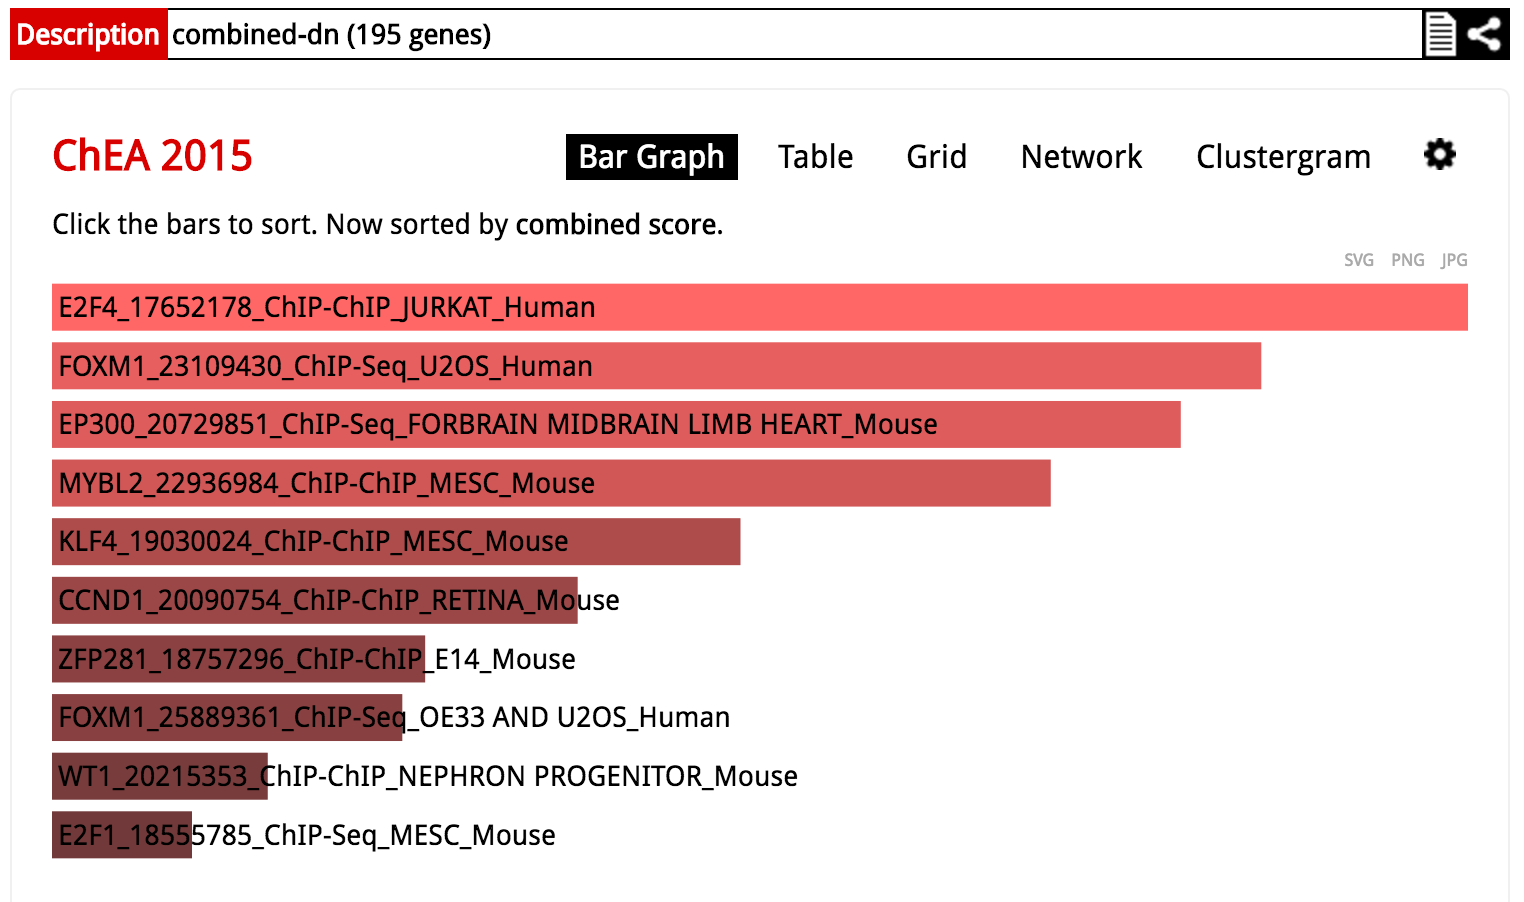

In [35]:
from IPython.display import Image
Image('img/combined-dn_ChEA.png', width='600')

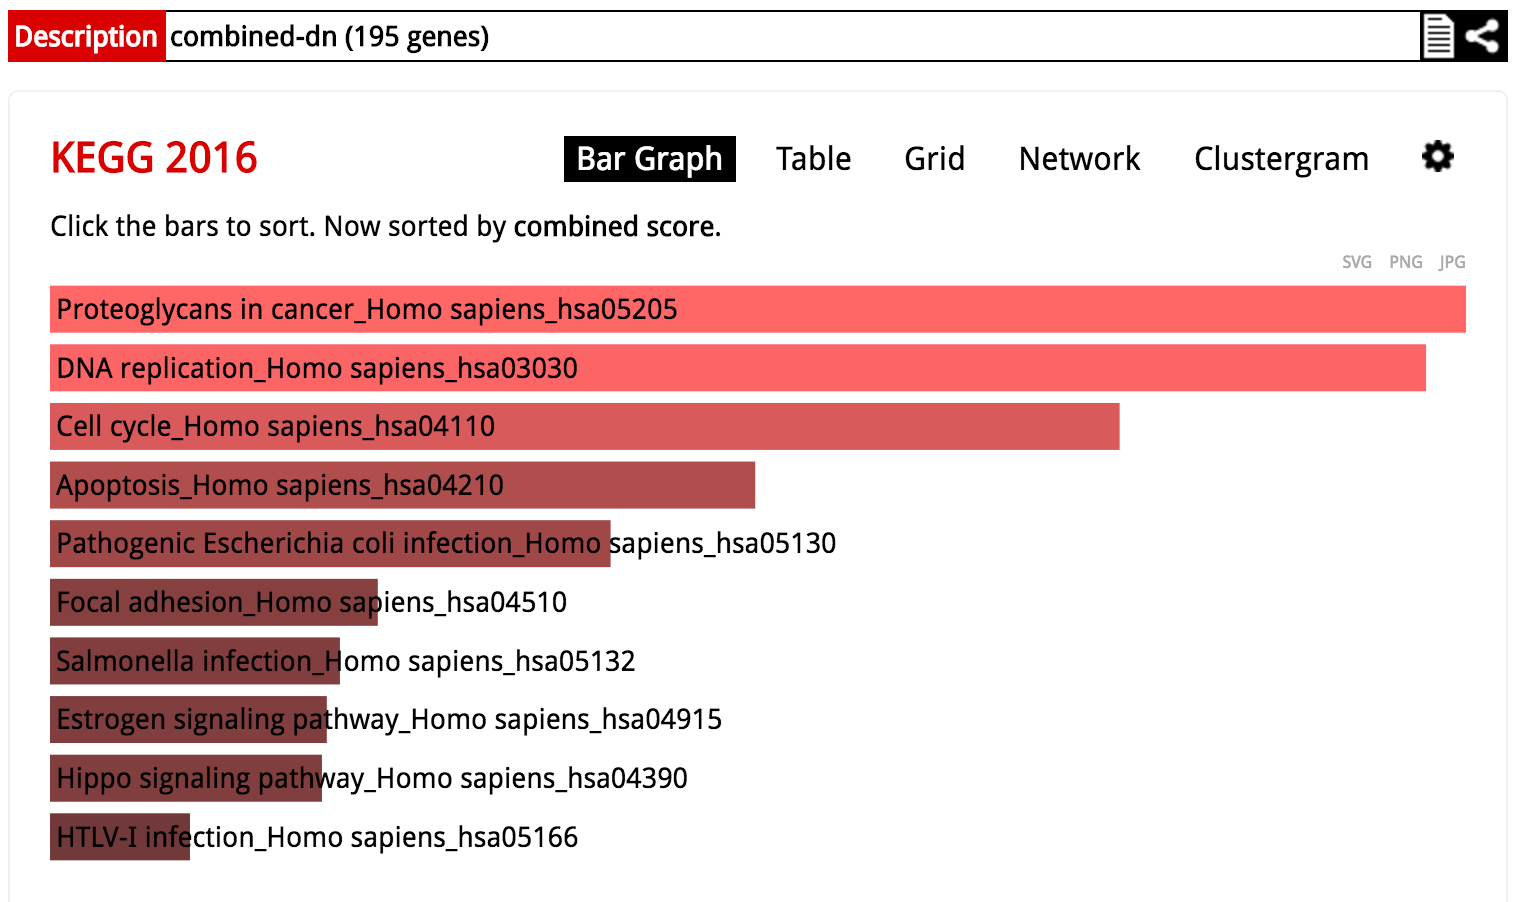

In [36]:
Image('img/combined-dn_KEGG.png', width='600')

We also found up-regulated genes after Zika infection are enriched for genes essential for normal brain morphology in mice.

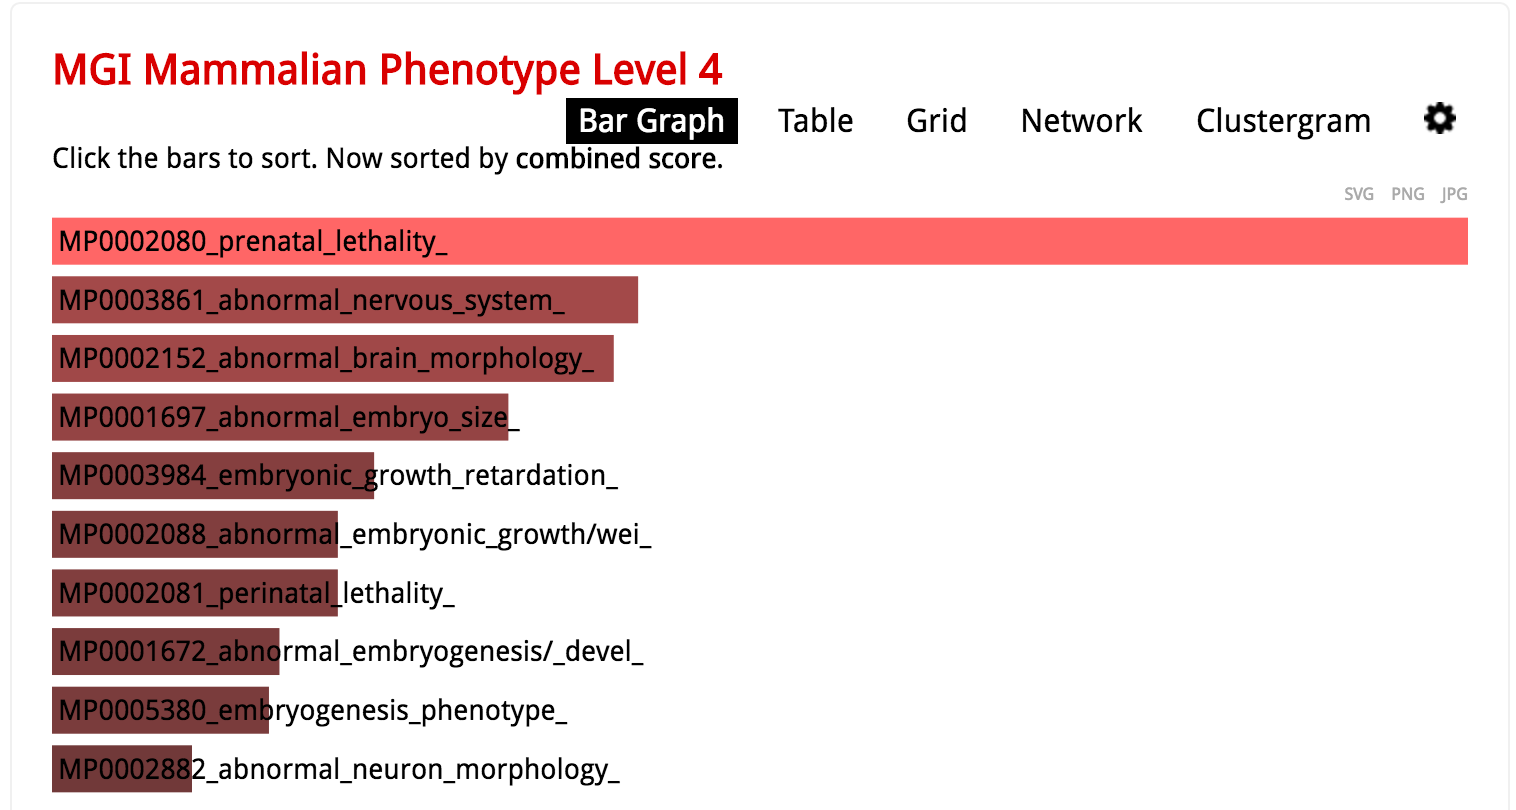

In [37]:
Image('img/combined-up_MGI4.png', width='600')

The above results are exciting because Zika infection of pregnant women would induce microcephaly in the fetus. We are interested in checking the overlapping genes between Zika induction and genes that are essential for brain morphology. 

To do that, we use the genes induced by Zika infection to enrich against the MGI Mammalian Phenotype level 4 gene set library using [Enrichr's API](http://amp.pharm.mssm.edu/Enrichr/help#api). The API responds with the top enriched terms and overlapping genes. We added hyperlinks to those overlapping genes to [Harmonizome](http://amp.pharm.mssm.edu/Harmonizome/), which is a integrated resource for human genes, proteins and their functional terms extracted and organized from over a hundred publicly available resources.

In [38]:
# Get Enrichr results for a specific gene set library from its API
gene_set_library = 'MGI_Mammalian_Phenotype_Level_4'
enrichr_results = RNAseq.enrichr_result(d_platform_cd['combined-up'], gmt=gene_set_library)

# Convert the enrichr_results object to a pandas DataFrame
enrichr_results = pd.DataFrame.from_records(enrichr_results[gene_set_library])
enrichr_results.columns = ['rank', 'terms', 'p-value', 'zscore', 'combined', 'Overlapping genes', 'q-value']
enrichr_results = enrichr_results.set_index('rank')

# Add hyperlinks for gene to Harmonizome
def gene_lists_to_links(genes):
    '''Convert a list of genes to a HTML string hyperlinking to Harmonizome'''
    html_str = ''
    for i, gene in enumerate(genes, start=1):
        html_str += '<a href="http://amp.pharm.mssm.edu/Harmonizome/gene/%s" target="_blank">%s</a>'%(gene, gene)
        if i % 6 == 0:
            html_str += '<br>'
        else:
            html_str += '<span>, </span>'
    return html_str

enrichr_results['Overlapping genes'] = enrichr_results['Overlapping genes'].apply(gene_lists_to_links)
# Visualize the DataFrame
HTML(enrichr_results.iloc[:4].to_html(escape=False, float_format=lambda x: '%.2e' % x, justify='left'))

Next we would like to identify small molecules that can either reverse or mimic ZIKV induced gene expression with the LINCS L1000 data.
For this we will utilize [L1000CDS2](http://amp.pharm.mssm.edu/L1000CDS2/#/index)<sup>[9](#ref9)</sup>, a small molecule gene expression signature search engine that we developed. 
L1000CDS2 contains gene expression signatures from ~30,000 small molecules profiled with the L1000 technology for the LINCS program. Users can search for small molecules that can potentially reverse or mimic their input gene expression signatures.

---

The following code posts the gene expression signatures induced by ZIKV infection to L1000CDS2 and prints out the resultant URLs. 

In [39]:
def post_to_cds2(genes, vals, name=None, aggravate=False):
    ## post CD signature to L1000CDS2 API and return a CDS2 url
    url = 'http://amp.pharm.mssm.edu/L1000CDS2/query'
    cds2_url = None

    data = {
        "genes": map(lambda x: x.upper(), genes), 
        "vals":  vals
        }
    config = {"aggravate":aggravate,"searchMethod":"CD","share":True,"combination":True,"db-version":"latest"}
    metadata = [{"key":"name","value": name}]

    payload = {"data":data,"config":config,"meta":metadata}
    headers = {'content-type':'application/json'}
    r = requests.post(url,data=json.dumps(payload),headers=headers)
    resCD = r.json()
    shareId = resCD['shareId']
    cds2_url = 'http://amp.pharm.mssm.edu/L1000CDS2/#/result/' + shareId
    return cds2_url

In [40]:
## get URL from L1000CDS2
for col in cd_results:
    res = cd_results[col].copy()
    srt_idx = np.abs(res).argsort()
    res = res[srt_idx]
    genes = res[:2000].index.tolist()
    vals = res[:2000].tolist()
    cds2_url_mimic = post_to_cds2(genes, vals, name=col, aggravate=True)
    print col, 'mimickers'
    display_link(cds2_url_mimic)
    cds2_url_reverse = post_to_cds2(genes, vals, name=col, aggravate=False)
    print col, 'reversers'
    display_link(cds2_url_reverse)    

NextSeq 500 mimickers


NextSeq 500 reversers


MiSeq mimickers


MiSeq reversers


combined mimickers


combined reversers


After examining the results from L1000CDS2 search, we have found several small molecules that are consistently highly ranked as potential mimickers and reversers of Zika virus infection signatures. They are shown below.

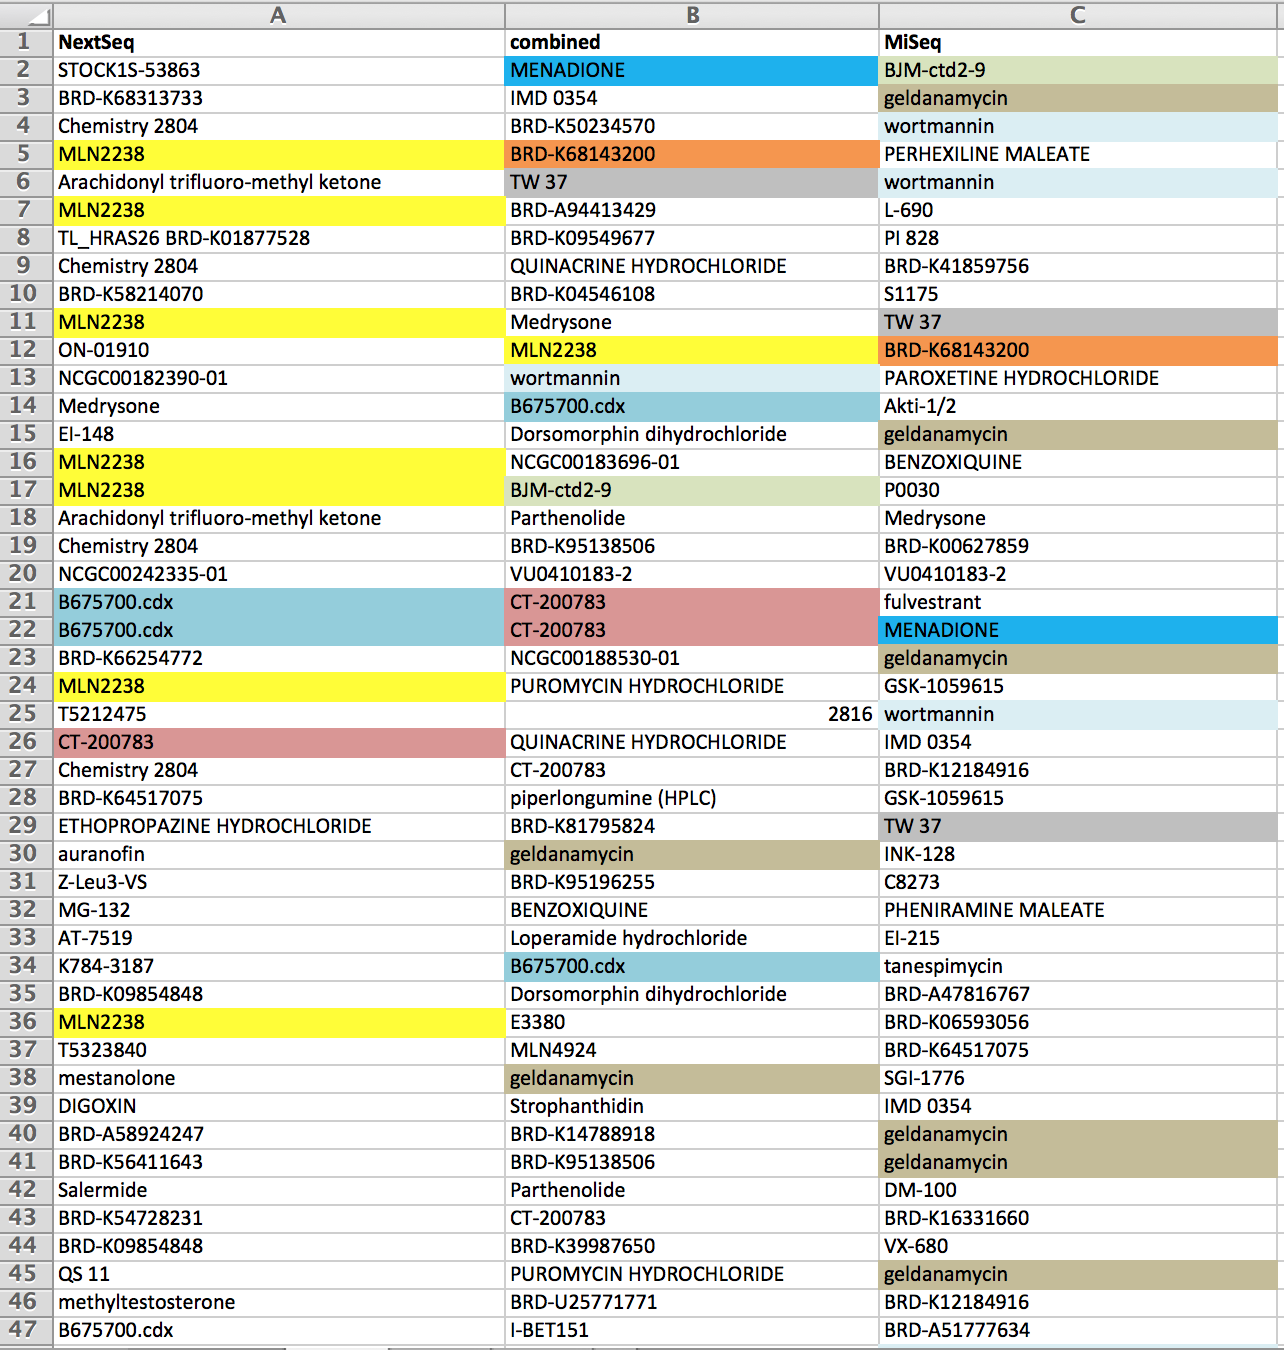

In [37]:
Image('img/zika-drug-mimickers.png', width='600')

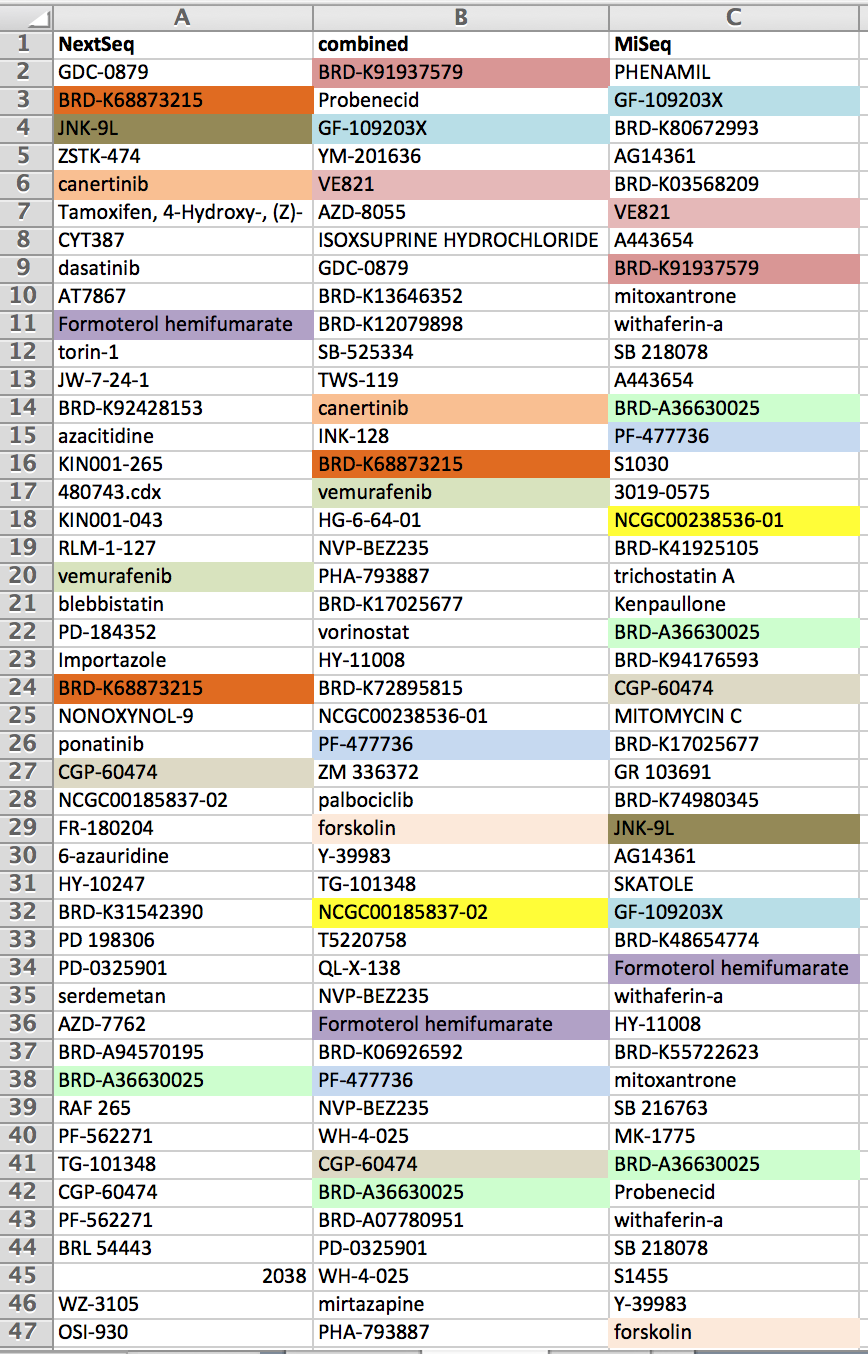

In [38]:
Image('img/zika-drug-reversers.png', width='600')

### Discussion and conclusions

In summary, we provide an open source RNA-seq processing pipeline (Fig. 4) that can be used to extract knowledge from any study that profiled gene expression using RNA-seq applied to mammalian cells, comparing two conditions. The advantage of providing the pipeline in the IPython notebook format and as a Docker container is that it enables others to quickly reproduce our results with minimal overhead and potentially apply similar methodology for the analysis of other similar datasets. Advanced users can add, improve and customize the pipeline by forking it on GitHub. The results that we obtained for ZIKV are consistent with the results published in the original study, but also enhance those findings by discovering a link between the upregulated genes and genes that, when knocked out in mice, induce morphological brain defects. Some of these genes could be the causal genes of the microcephaly phenotype observed in newborns of mothers infected with the virus. Nevertheless, caution should be used when interpreting these results because they may simply indicate a reduction in cell cycle activity and an increase in neuronal differentiation of the type of cells used in the original study.

### Data and software availability

The IPython notebook, as well as other scripts and data files for this tutorial are available on GitHub at: https://github.com/MaayanLab/Zika-RNAseq-Pipeline. DOI: [10.5281/zenodo.56311](http://dx.doi.org/10.5281/zenodo.56311).
The Docker image for this tutorial is available on DockerHub at: https://hub.docker.com/r/maayanlab/zika/ 

---

## Workflow

In [3]:
from IPython.display import IFrame, display
display(IFrame('http://maayanlab.github.io/Zika-RNAseq-Pipeline/flowchart.html', width="1000", height="1000"))

### Author contributions
AM conceived and lead the study. ZW developed the software and performed the analysis. AM interpreted the results. Both authors wrote the paper and tutorials.  
### Competing interests
No competing interests were disclosed
### Grant information
This work is partially supported by National Institutes of Health grants [U54HL127624](https://projectreporter.nih.gov/project_info_details.cfm?aid=8935882&icde=29200105&ddparam=&ddvalue=&ddsub=&cr=9&csb=default&cs=ASC), [U54CA189201](https://projectreporter.nih.gov/project_info_details.cfm?aid=8898032&icde=29200105&ddparam=&ddvalue=&ddsub=&cr=4&csb=default&cs=ASC), and [R01GM098316](https://projectreporter.nih.gov/project_info_details.cfm?aid=8843008&icde=29200105&ddparam=&ddvalue=&ddsub=&cr=7&csb=default&cs=ASC).
### Acknowledgements
We would like to thank Dr. Ajay Pillai from NHGRI for useful suggestions and Kathleen Jagodnik from NASA for copyediting an early version of the manuscript.
### References
---
<a id='ref1'></a>
1. Begley, C.G. and L.M. Ellis (2012) **Drug development: Raise standards for preclinical cancer research.** _Nature_,  483(7391): p. 531-533. PMID:[22460880](http://www.ncbi.nlm.nih.gov/pubmed/22460880)
<a id='ref2'></a>
1. Shen, H. (2014) **Interactive notebooks: Sharing the code** _Nature_, 515, 7525. PMID: [25373681](http://www.ncbi.nlm.nih.gov/pubmed/25373681)
<a id='ref3'></a>
3. https://ipython.org. **A gallery of interesting IPython Notebooks.** 2016  [cited 2016 25 April]; Available from: https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks - reproducible-academic-publications.
<a id='ref4'></a>
1. Tang, H., Hammack, C., Ogden, Sarah C., Wen, Z., Qian, X., Li, Y., Yao, B., Shin, J., Zhang, F., Lee, Emily M. et al. (2016) **Zika Virus Infects Human Cortical Neural Progenitors and Attenuates Their Growth.** _Cell Stem Cell_. PMID: [26952870](http://www.ncbi.nlm.nih.gov/pubmed/26952870)
<a id='ref5'></a>
1. Andrews, S. (2010) **FastQC: A quality control tool for high throughput sequence data.** _Reference Source_.
<a id='ref6'></a>
2. Dobin, A., Davis, C.A., Schlesinger, F., Drenkow, J., Zaleski, C., Jha, S., Batut, P., Chaisson, M. and Gingeras, T.R. (2013) **STAR: ultrafast universal RNA-seq aligner.** _Bioinformatics_, 29, 15-21. PMID: [23104886](http://www.ncbi.nlm.nih.gov/pubmed/23104886)
<a id='ref7'></a>
3. Liao, Y., Smyth, G.K. and Shi, W. (2014) **featureCounts: an efficient general purpose program for assigning sequence reads to genomic features.** _Bioinformatics_, 30, 923-930. PMID: [24227677](http://www.ncbi.nlm.nih.gov/pubmed/24227677)
<a id='ref8'></a>
4. Robinson, M.D., McCarthy, D.J. and Smyth, G.K. (2010) **edgeR: a Bioconductor package for differential expression analysis of digital gene expression data.** _Bioinformatics_, 26, 139-140. PMID: [19910308](http://www.ncbi.nlm.nih.gov/pubmed/19910308)
<a id='ref9'></a>
5. Clark, N., Hu, K., Feldmann, A., Kou, Y., Chen, E., Duan, Q. and Ma'ayan, A. (2014) **The characteristic direction: a geometrical approach to identify differentially expressed genes.** _BMC Bioinformatics_, 15, 79. PMID: [24650281](http://www.ncbi.nlm.nih.gov/pubmed/24650281)
<a id='ref10'></a>
6. Chen, E., Tan, C., Kou, Y., Duan, Q., Wang, Z., Meirelles, G., Clark, N. and Ma'ayan, A. (2013) **Enrichr: interactive and collaborative HTML5 gene list enrichment analysis tool.** _BMC Bioinformatics_, 14, 128. PMID: [23586463](http://www.ncbi.nlm.nih.gov/pubmed/23586463)
<a id='ref11'></a>
8. Duan, Q., Reid, S.P., Clark, N., Wang, Z., Fernandez, N., Rouillard, A., Readhead B., Hodos, R., Tritsch, S., Hafner, M., Niepel, M., Sorger, P., Dudley, J., Bavari, S., Panchal, R., Ma’ayan, A. (2016) **L1000CDS2: LINCS L1000 Characteristic Direction Signatures Search Engine.** _npj Systems Biology and Applications_ (Accepted)